In [1]:
!pip install yfinance vaderSentiment textblob pandas matplotlib seaborn -q

  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

data={
    "Headline":[
        "Apple reports record profits in Q3 beating analyst expectations",
        "Tesla faces production delays due to supply chain issues",
        "Microsoft announces new AI-powered features for Office 365",
        "Amazon stock falls after weak holiday sales forecast",
        "Google launches new sustainability initiative for data centers",
        "Meta fined $1.3 billion for data privacy violations"
    ]
}

news_df=pd.DataFrame(data)
news_df

ImportError: DLL load failed while importing _path: The specified module could not be found.

In [4]:
analyzer=SentimentIntensityAnalyzer()

news_df['Sentiment']=news_df['Headline'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
news_df['Sentiment_Label']=news_df['Sentiment'].apply(lambda s:'positive' if s>0.05 else ('Negative' if s<-0.05 else 'Neutral'))

news_df

,Headline,Sentiment,Sentiment_Label
0,Apple reports record profits in Q3 beating ana...,-0.0258,Neutral
1,Tesla faces production delays due to supply ch...,0.0000,Neutral
2,Microsoft announces new AI-powered features fo...,0.0000,Neutral
3,Amazon stock falls after weak holiday sales fo...,0.1280,positive
4,Google launches new sustainability initiative ...,0.0000,Neutral
5,Meta fined $1.3 billion for data privacy viola...,-0.5267,Negative


C:\Users\12san\AppData\Local\Temp\ipykernel_15192\680226969.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=news_df,x='Sentiment_Label',palette='coolwarm')


Text(0, 0.5, 'Count')

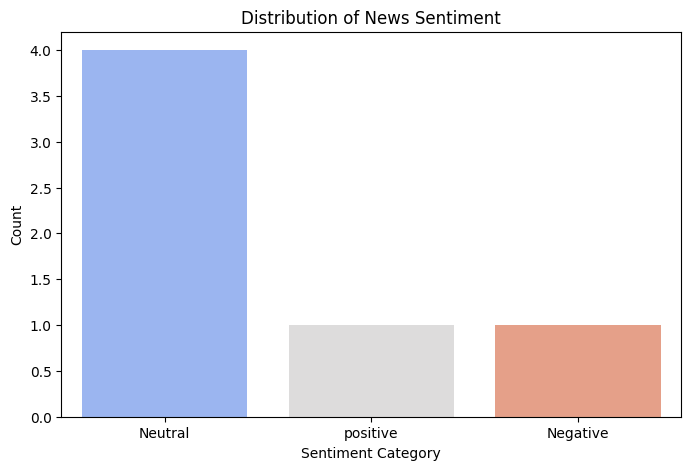

In [6]:
def textblob_sentiment(text):
    return TextBlob(text).sentiment.polarity

news_df['TextBlob_Sentiment']=news_df['Headline'].apply(textblob_sentiment)
news_df[['Headline','Sentiment','TextBlob_Sentiment']]

plt.figure(figsize=(8,5))
sns.countplot(data=news_df,x='Sentiment_Label',palette='coolwarm')
plt.title("Distribution of News Sentiment")
plt.xlabel('Sentiment Category')
plt.ylabel('Count')